In [25]:
import sys

# Move to scripts directory
sys.path.append('../utils')

from create_cross_sec import create_cross_sec

In [26]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/area_scaled-cross-sec-full-sim-data-16-healpix/TestSource.101.inc1.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(18, 96, 128)


In [27]:
CONVERT_FROM_CART = True
NSIDE=16

import sys

sys.path.append("../utils")

from mapping import reconstruct_from_cartesian

with open(f'/Users/akotamraju/Documents/dev/URAP/main-responseapprox/mappings/NSIDE_16_x128_y96.pkl', 'rb') as f:
    cart_to_heal_map = pickle.load(f)

new_arr = []
if CONVERT_FROM_CART:
    for i in range(len(y_arr)):
        cross_sec = reconstruct_from_cartesian(y_arr[i], NSIDE, cart_to_heal_map)
        new_arr.append(cross_sec)
        
    y_arr = new_arr

In [28]:
import matplotlib.pyplot as plt

# plt.hist(y_arr[5])

In [29]:
print(y_arr)

[array([0., 0., 0., ..., 0., 0., 0.]), array([1.06563685e+01, 3.12962365e-03, 2.50369892e-02, ...,
       8.31853967e+00, 1.56481183e+00, 1.28940495e+00]), array([2.65767641e+01, 3.75554838e-02, 1.87777419e-02, ...,
       1.48657124e+00, 6.35313602e-01, 6.97906075e-01]), array([29.93485024,  0.06259247,  0.04694435, ...,  0.41623995,
        0.31609199,  0.36929559]), array([32.43854917,  0.09388871,  0.08449984, ...,  0.25036989,
        0.1846478 ,  0.20655516]), array([25.79748777,  0.08762946,  0.10953683, ...,  0.25036989,
        0.24098102,  0.32548086]), array([13.52623343,  0.10014796,  0.09075909, ...,  0.15961081,
        0.21281441,  0.14709231]), array([9.51718553, 0.08449984, 0.0532036 , ..., 0.03442586, 0.03129624,
       0.03442586]), array([8.69722413, 0.02816661, 0.05946285, ..., 0.02190737, 0.02503699,
       0.01877774]), array([11.41060784,  0.01877774,  0.01564812, ...,  0.01564812,
        0.01564812,  0.01251849]), array([1.32132711e+01, 6.25924731e-03, 1.56481

In [30]:
NSIDE = 16
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 5

# split_data = create_cross_sec(arr, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072
3072


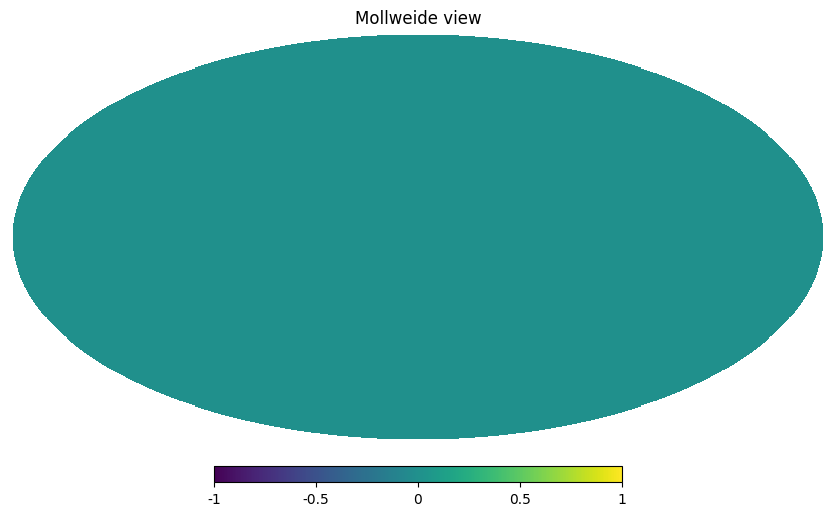

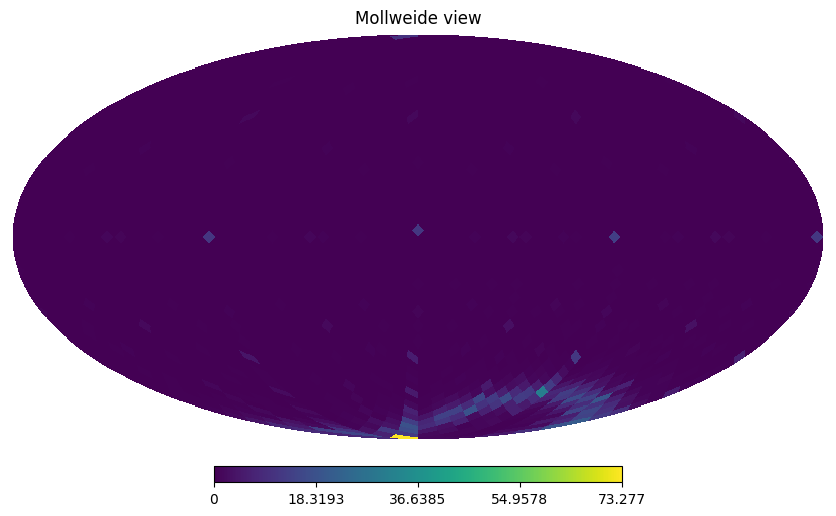

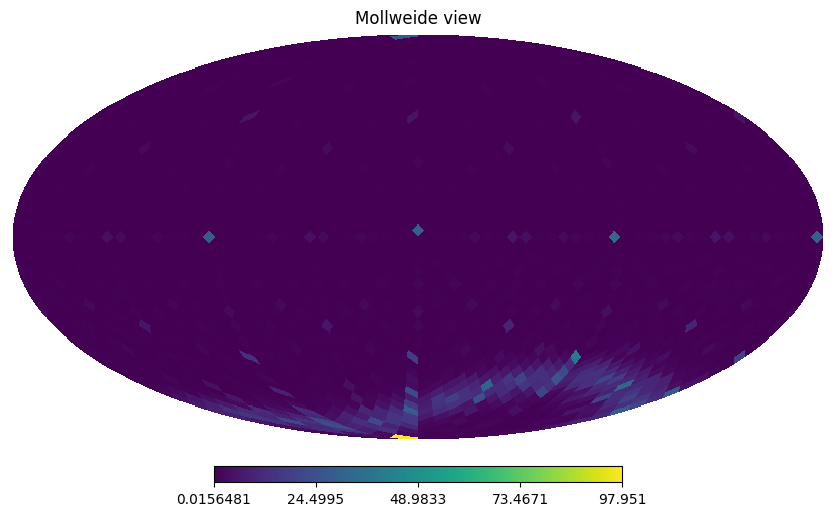

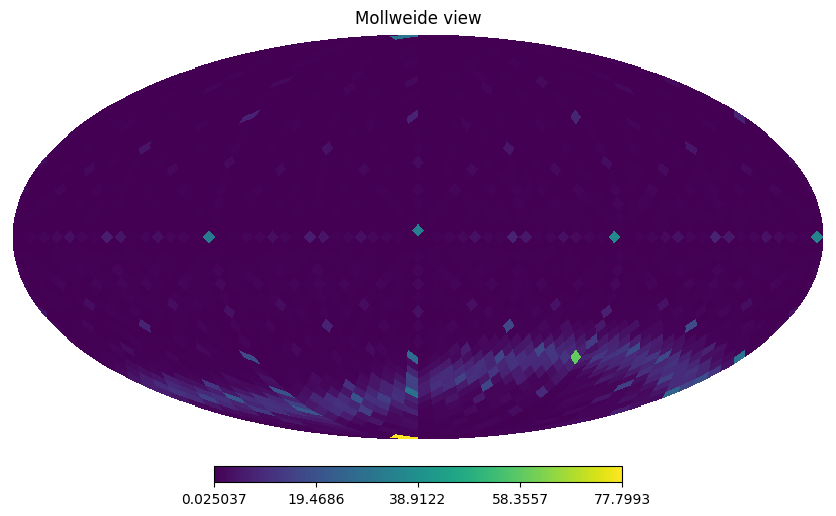

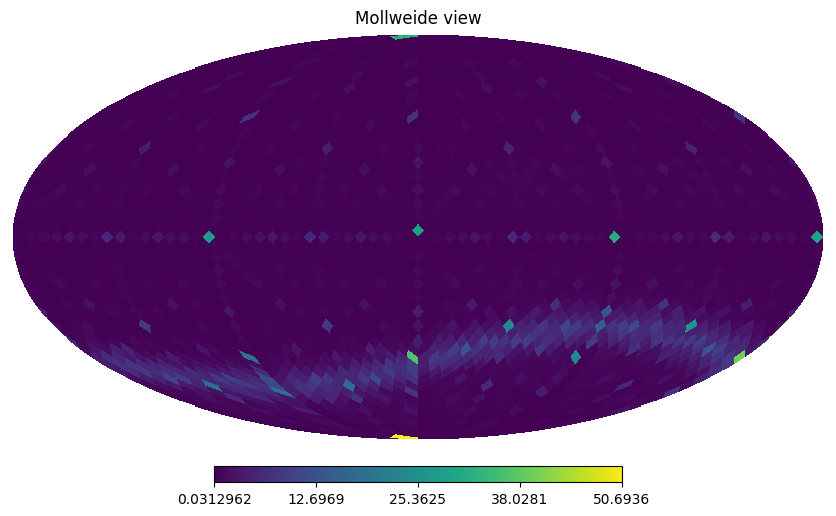

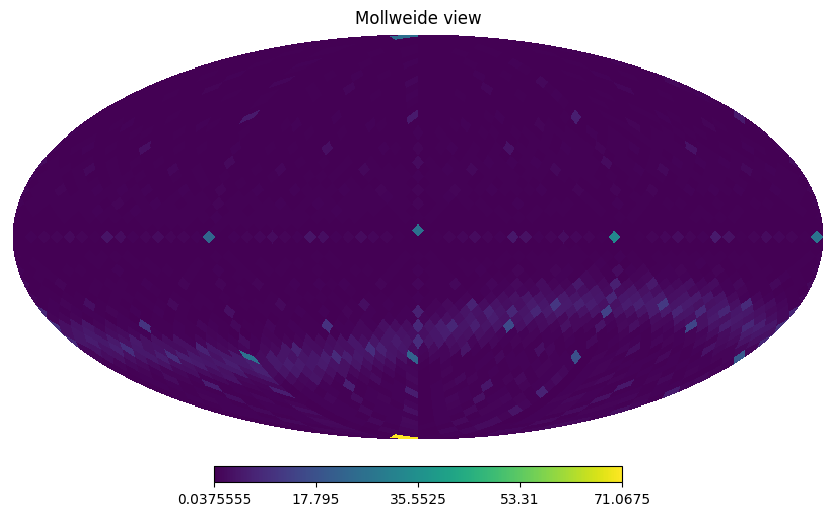

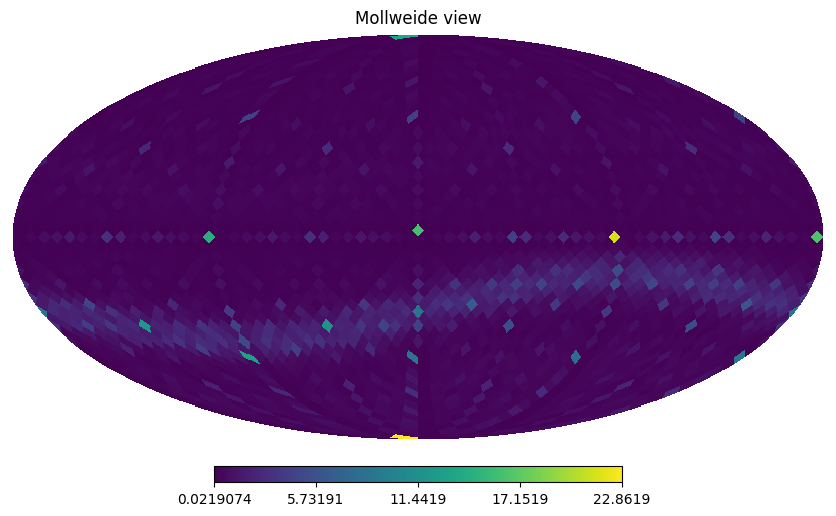

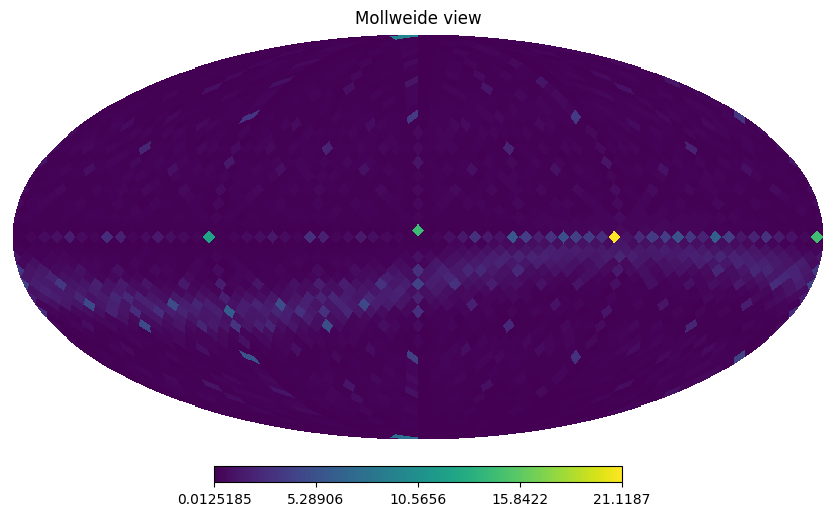

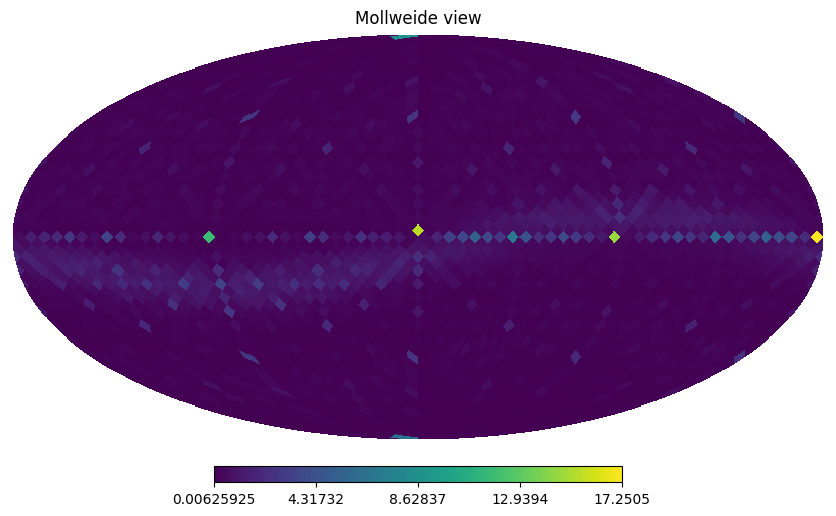

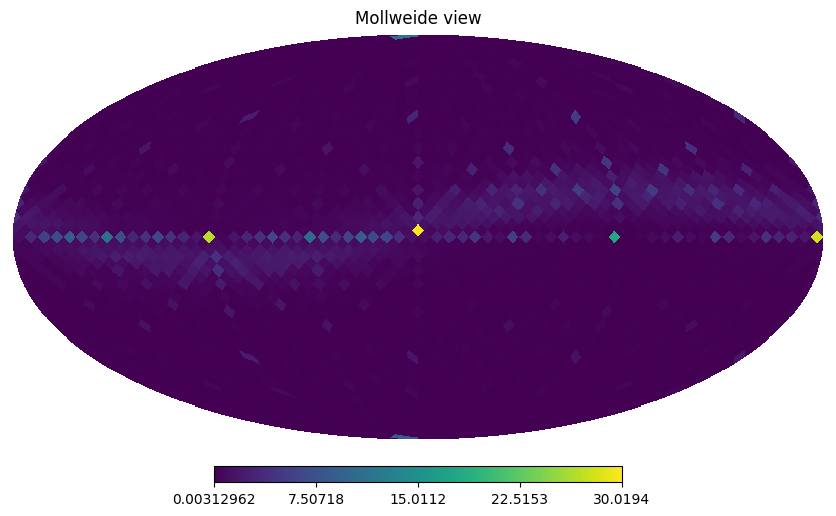

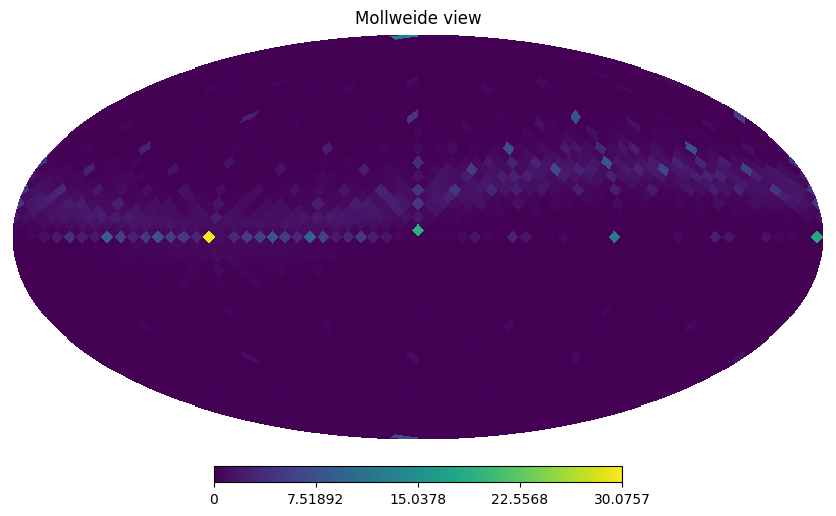

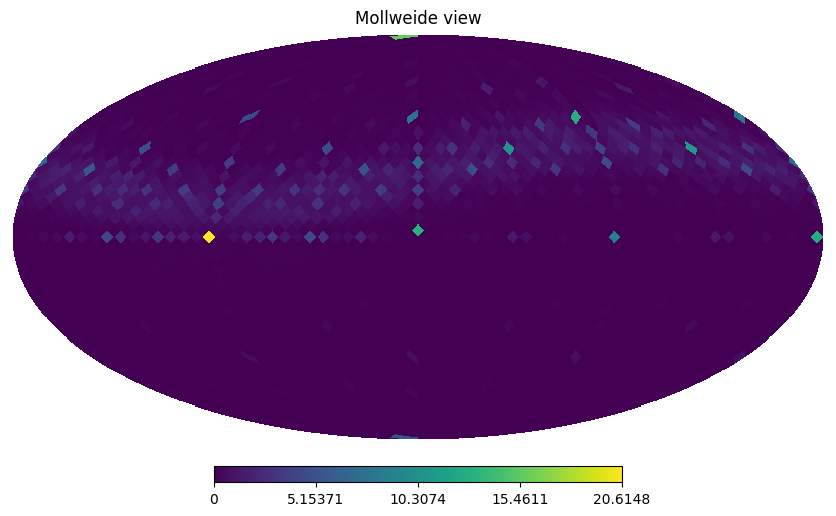

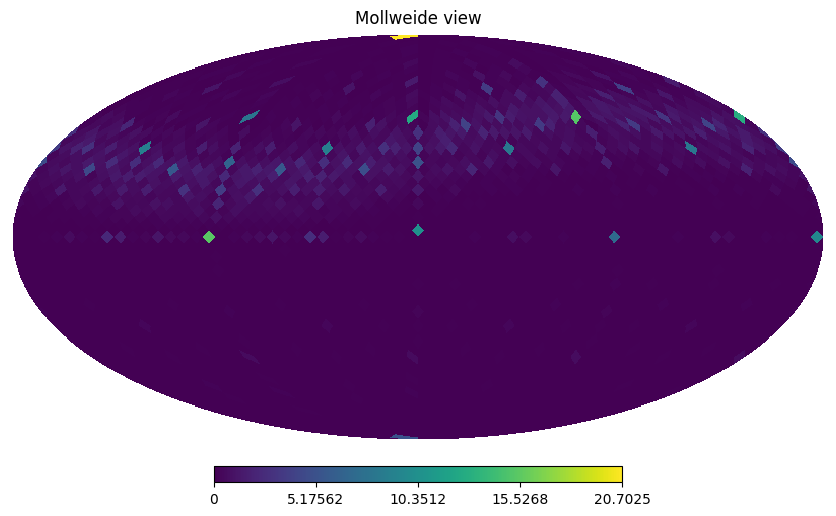

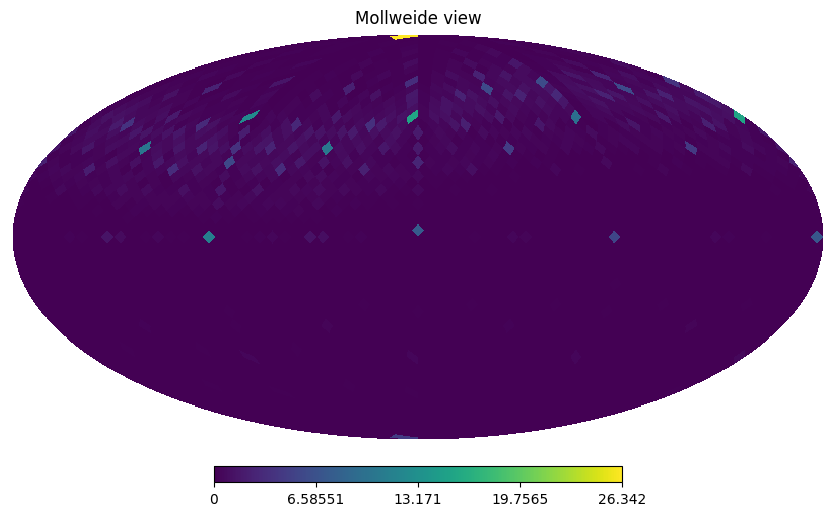

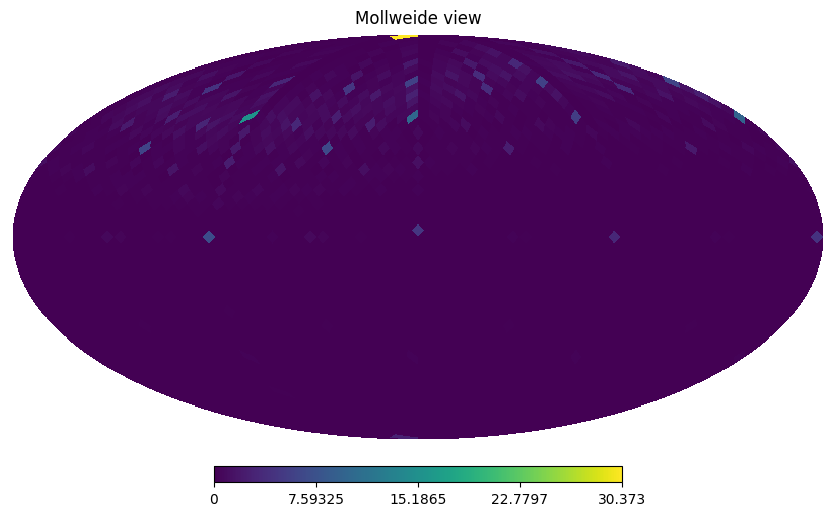

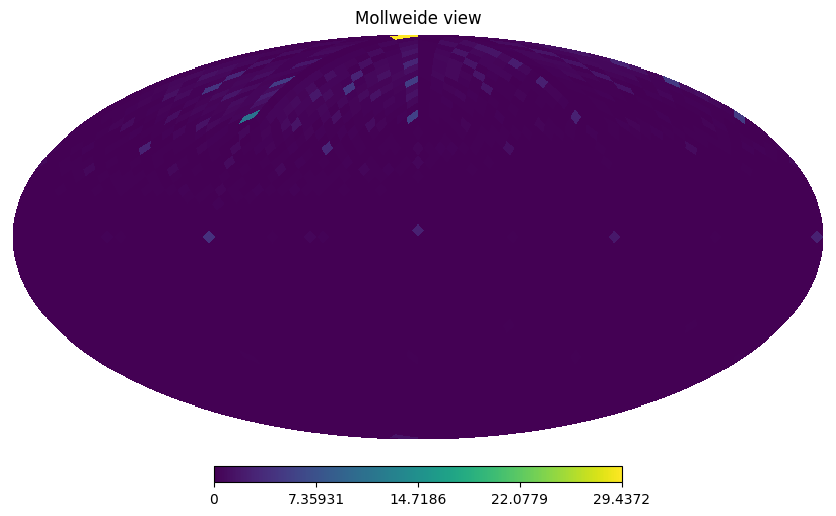

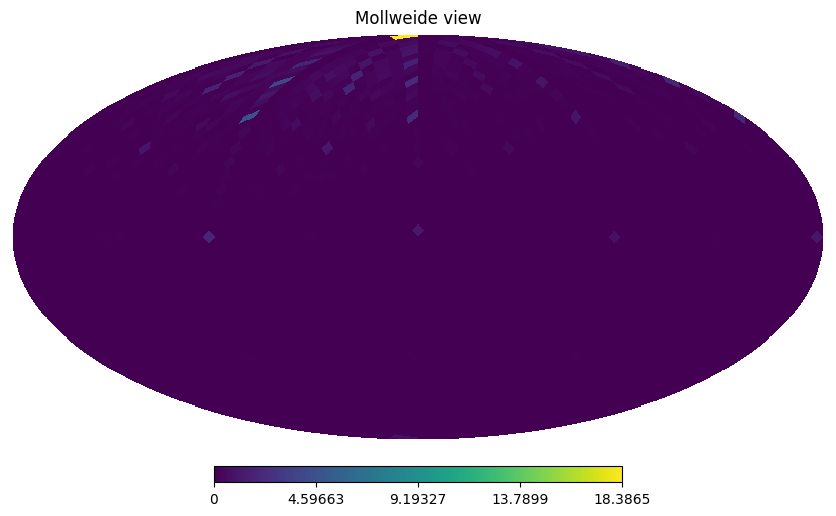

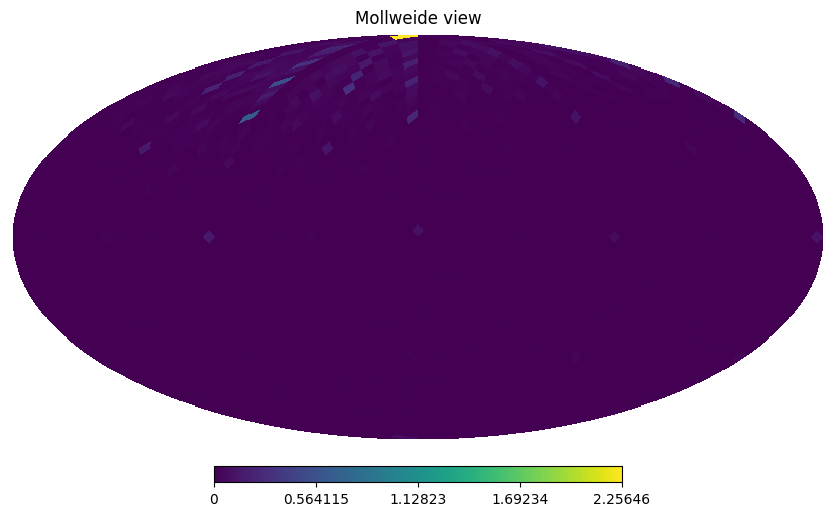

In [31]:

import healpy as hp

sys.path.append("../utils")
from utils import normalize, scale

import numpy as np

def replace_outliers_with_zero(arr, threshold):
    """
    Replace outliers in an array with 0.

    Parameters:
    - arr: NumPy array
      The input array.
    - threshold: float
      Values greater than or equal to this threshold are considered outliers and will be set to 0.

    Returns:
    - NumPy array
      The modified array with outliers set to 0.
    """
    # Calculate the mean and standard deviation of the array
    mean = np.mean(arr)
    std_dev = np.std(arr)

    # Define a boolean mask to identify outliers
    is_outlier = np.abs(arr - mean) >= threshold * std_dev

    # Replace outliers with 0
    arr[is_outlier] = 0

    return arr


def denoise(arr, THRESHOLD):
    new_arr = []
    for i in range(len(arr) - 1):
        if arr[i - 1] < THRESHOLD and arr[i + 1] < THRESHOLD: 
            new_arr.append(0)
        else:
            new_arr.append(arr[i])
    
    # Add last element
    new_arr.append(arr[-1])

    return np.asarray(new_arr)



def find_neighbors_above_threshold(map_array, threshold):
    # Create a new array to store the filtered values
    filtered_array = np.zeros_like(map_array)

    # Get the HEALPix NSIDE and the pixel indices
    nside = hp.get_nside(map_array)
    indices = np.arange(hp.nside2npix(nside))

    # Loop through all pixel indices
    for idx in indices:
        # Get the pixel's theta and phi coordinates
        theta, phi = hp.pix2ang(nside, idx)

        # Get the neighbors of the current pixel
        neighbors = hp.get_all_neighbours(nside, theta, phi)

        # Check if any neighbor has a value greater than the threshold
        if any(map_array[neighbors] > threshold):
            filtered_array[idx] = map_array[idx]

    return filtered_array
    

for i in range(len(y_arr)):
    test_data_y = y_arr[i]

    print(len(test_data_y))

    # Normalize each cross section
    range_val = np.max(test_data_y) - np.min(test_data_y)

    cross_sec = test_data_y


    # SCALE BETWEEN 0 AND 1 TO GET PROBABILITY
    minval = np.min(cross_sec)
    maxval = np.max(cross_sec)


    # # Scale between 0 and 1
    # cross_sec = (cross_sec - minval)/ maxval

    # Would this be better for probability
    # cross_sec = cross_sec / sum(cross_sec)


    # print(minval, maxval)

    # IGNORE CODE: Some code for ignoring super big values
    # copy = np.copy(cross_sec)
    # mid_loc = range_val // 2

    # for i in range(len(copy)):
    #     if copy[i] > 1.2 * mid_loc:
    #         copy[i] = 0

    # cross_sec = copy

    # cross_sec = normalize(cross_sec)

    # # # NUMPY NORM
    # frobenius_norm = np.linalg.norm(cross_sec)
    # cross_sec = cross_sec / frobenius_norm

    # TRY DOING LOG OF DATA
    # this worked really well for exposing the cone in cross-sec-big-noisy-128-healpix test 14
    # cross_sec = np.log(cross_sec + 1)  # Adding 1 to avoid issues with zero values
    # show first without min=2.0, then show with min=2.0
    # hp.mollview(cross_sec,nlocs=5)

    # TRY DOING MIN AND MAX 
    # this is good for visualizing without the outlier dots
    # hp.mollview(cross_sec,nlocs=5, min=50, max=3000
    # )

    # , norm="log" doesn't work :(
    # cmap='viridis', plasma, inferno - just options for color
    hp.mollview(cross_sec,nlocs=5)

0.003129623653380371 2.2564586540872473
DTYPE:  float32


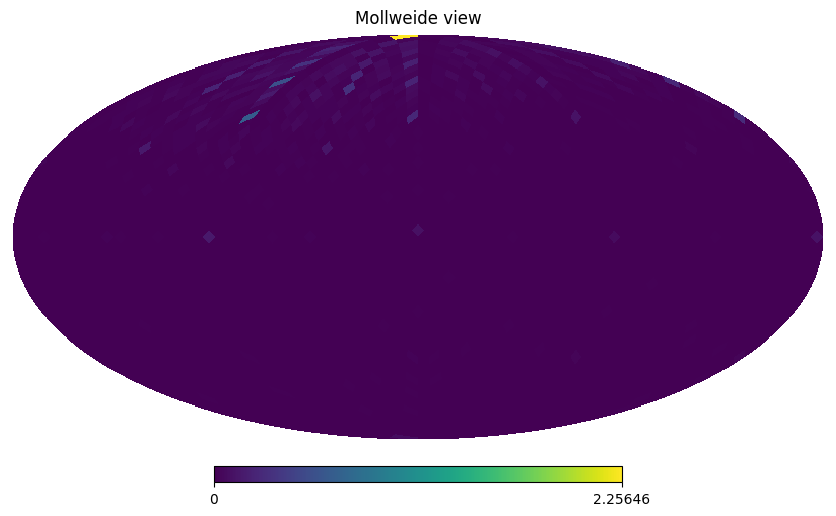

In [32]:

import torch

y_after = torch.tensor(cross_sec).to(dtype=torch.float32, device="cpu")
y_after = y_after.detach().numpy()

minval = np.min(cross_sec[np.nonzero(cross_sec)])
maxval = np.max(cross_sec[np.nonzero(cross_sec)])

print(minval, maxval)

print("DTYPE: ", y_after.dtype)

hp.mollview(y_after)

In [51]:
NSIDE = 1024
NUMPIX = 12 * NSIDE ** 2
COMPTON_RESOLUTION_DEG = 8


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc515.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

split_data = create_cross_sec(vals, NSIDE, NUMPIX, COMPTON_RESOLUTION_DEG)

IndexError: list index out of range

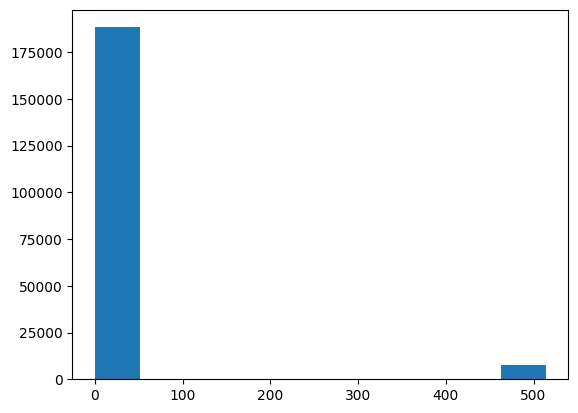

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_arr[5])
plt.show()

(array([1.88281e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.14000e+02, 2.37000e+02, 9.20000e+01, 2.00000e+00, 7.88200e+03]),
 array([-0.20958358,  0.30149795,  0.81257947,  1.323661  ,  1.83474253,
         2.34582406,  2.85690558,  3.36798711,  3.87906864,  4.39015017,
         4.9012317 ]),
 <BarContainer object of 10 artists>)

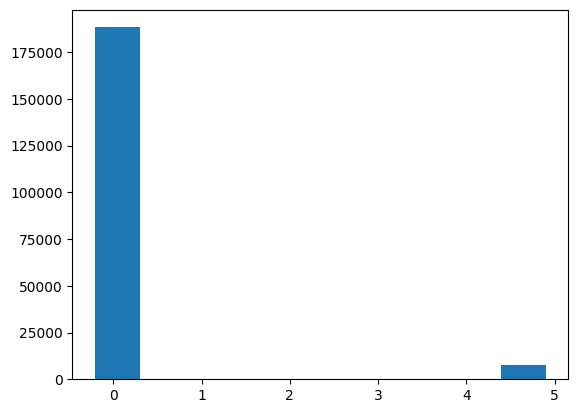

In [15]:
plt.hist(normalize(scale(y_arr[5])))

In [1]:
new_test_data = split_data['y'][10]
hp.mollview(new_test_data)

NameError: name 'split_data' is not defined

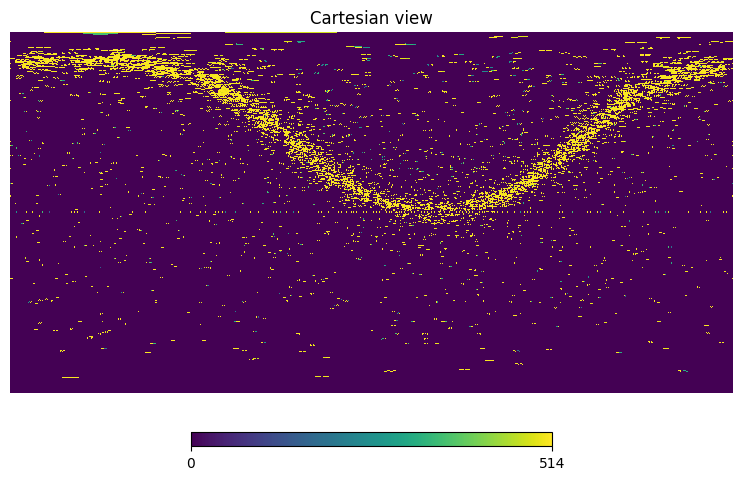

In [312]:
cartmap = hp.cartview(y_arr[10], return_projected_map=True)

In [ ]:
import cv2
reshaped = cv2.resize(cartmap, (384, 512))

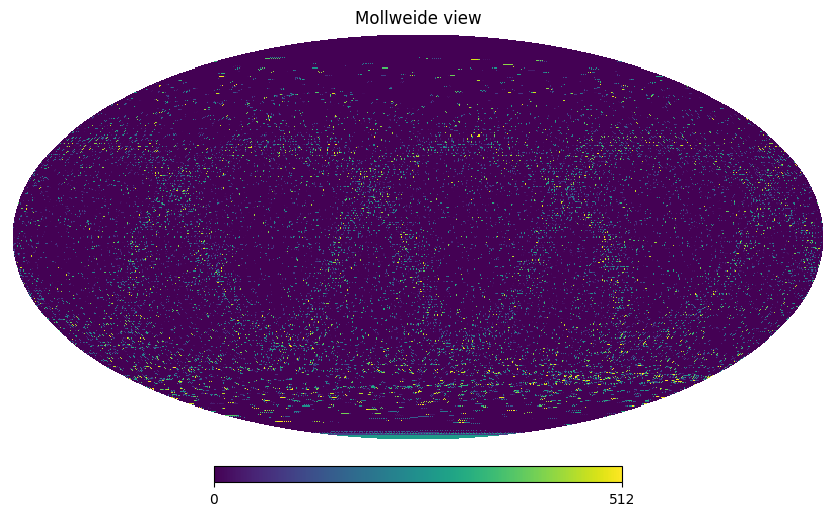

In [136]:
hp.mollview(reshaped.flatten())

In [145]:
import healpy as hp
import numpy as np

def arrange_healpix_pixels(nside, pixel_list):
    total_pixels = hp.nside2npix(nside)
    arranged_pixels = np.full(total_pixels, hp.UNSEEN)

    for pixel in pixel_list:
        arranged_pixels[pixel] = pixel

    return arranged_pixels

my_nside = 128
arranged_pixels = arrange_healpix_pixels(my_nside, y_arr[20])


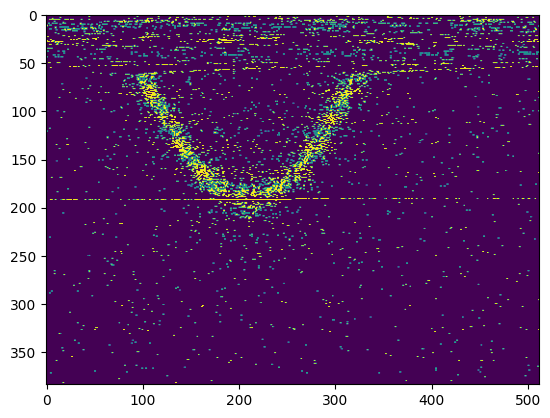

In [314]:
import matplotlib.pyplot as plt

plt.imshow(y_arr[10].reshape(384, 512))

(array([2.96000e+02, 1.20300e+03, 3.04700e+03, 6.34100e+03, 1.08320e+04,
        1.74100e+04, 1.58080e+04, 3.49600e+03, 4.96000e+02, 5.38557e+05]),
 array([ 74.4506 , 118.58249, 162.71438, 206.84627, 250.97816, 295.11005,
        339.24194, 383.37383, 427.50572, 471.63761, 515.7695 ]),
 <BarContainer object of 10 artists>)

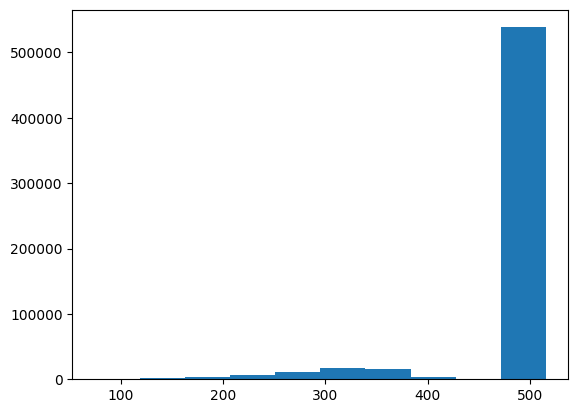

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


f = open(f"/Users/akotamraju/Documents/dev/URAP/new-responseapprox/data/full-sim-data/FlatContinuumIsotropic.inc965.id1.tra.gz.pkl", "rb");

vals = pickle.load(f)

f.close()

plt.hist(vals[2])



(array([ 18757.,  62244.,  93456., 105526., 100705.,  96599.,  53445.,
         36117.,  23052.,   7585.]),
 array([  0.,  18.,  36.,  54.,  72.,  90., 108., 126., 144., 162., 180.]),
 <BarContainer object of 10 artists>)

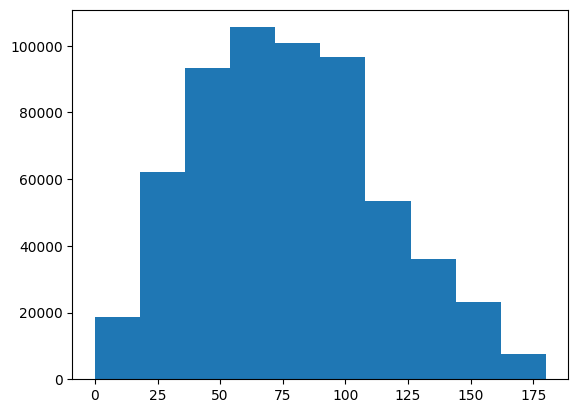

In [ ]:
plt.hist(vals[3])

In [ ]:
max(vals[4])

179.96627676698233